In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np 

In [3]:
np.set_printoptions(precision=4, linewidth=100)

In [4]:
mba_salary_df = pd.read_csv( r"MBA Salary.csv")

In [5]:
mba_salary_df.head( 10 )

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000
7,8,68.00,235000
8,9,82.80,425000
9,10,59.00,240000


In [6]:
mba_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
S. No.                    50 non-null int64
Percentage in Grade 10    50 non-null float64
Salary                    50 non-null int64
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [7]:
import statsmodels.api as sm

In [8]:
X = sm.add_constant( mba_salary_df['Percentage in Grade 10'] )
X.head(5)

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [9]:
Y = mba_salary_df['Salary']

In [10]:
Y.head(10)

0    270000
1    200000
2    240000
3    250000
4    180000
5    300000
6    260000
7    235000
8    425000
9    240000
Name: Salary, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.8,random_state = 100 )

In [12]:
mba_salary_lm = sm.OLS( train_y, train_X ).fit()

In [13]:
mba_salary_lm

In [14]:
mba_salary_lm.params

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64

In [15]:
print(mba_salary_lm.params)

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [16]:
mba_salary_lm.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x0000015B6D11F388>>

In [17]:
mba_salary_lm.summary2

<bound method RegressionResults.summary2 of <statsmodels.regression.linear_model.OLSResults object at 0x0000015B6D11F388>>

In [18]:
mba_salary_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     10.16
Date:                Sat, 29 Aug 2020   Prob (F-statistic):            0.00287
Time:                        02:09:41   Log-Likelihood:                -502.43
No. Observations:                  40   AIC:                             1009.
Df Residuals:                      38   BIC:                             1012.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.059e+04   7.19e+04      0.426      0.673   -1.15e+05    1.76e+05
Percentage in Grade 10  3560.5874   1116.926      3.188      0.003    1299.489    5821.686
==============================================================================
Omnibus:                        2.048   Durbin-Watson:                   2.611
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                1.724
Skew:                           0.369   Prob(JB):                        0.422
Kurtosis:                       2.300   Cond. No.                         413.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2020-08-29 02:09      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

In [20]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [21]:
mba_salary_resid = mba_salary_lm.resid

In [22]:
mba_salary_resid

0      18656.296611
11    -64222.528623
18    -48828.402452
45    -55605.907157
38     42140.995674
25    -10601.230584
26    -28616.654795
35    110019.820908
17      5868.537361
7     -37707.227686
47     -6267.815069
31    -44222.528623
32     73580.408291
19    -16661.941240
21     51383.345205
13    123883.961571
1    -102366.920585
4     -67783.116006
12    162413.947080
27    -76070.751983
40     91808.073251
22     23732.184931
29   -119146.640303
9       -661.941240
16    -59873.688898
44     67709.541708
48    -25586.052920
46    -92707.227686
14     27292.772314
41     98686.651939
2     -46949.577218
34     56098.498215
30    -47631.339366
10     12898.646142
15     76495.987346
23    -95737.829560
39    -15737.829560
3       5777.471377
24    -85056.067412
8      99596.079047
dtype: float64

<Figure size 576x432 with 0 Axes>

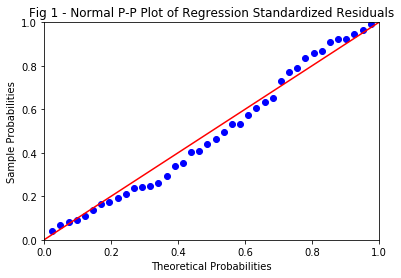

In [23]:
probplot = sm.ProbPlot( mba_salary_resid )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

In [24]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

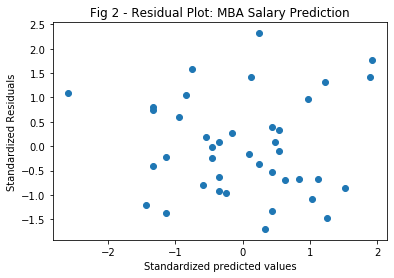

In [25]:
plt.scatter( get_standardized_values( mba_salary_lm.fittedvalues ),
get_standardized_values( mba_salary_resid ) )
plt.title( "Fig 2 - Residual Plot: MBA Salary Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");

In [26]:
from scipy.stats import zscore

In [27]:
mba_salary_df['z_score_salary'] = zscore( mba_salary_df.Salary )

In [28]:
mba_salary_df[ (mba_salary_df.z_score_salary > 3.0) | (mba_salary_df.z_score_salary < -3.0) ]

,S. No.,Percentage in Grade 10,Salary,z_score_salary


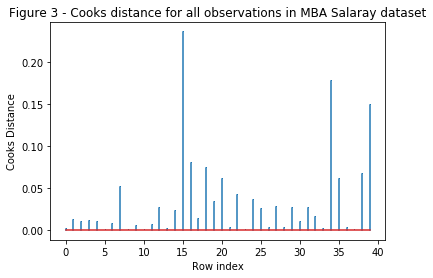

In [30]:
import numpy as np
mba_influence = mba_salary_lm.get_influence()
(c, p) = mba_influence.cooks_distance
plt.stem( np.arange( len( train_X) ),
np.round( c, 3 ),
markerfmt="," );
plt.title( "Figure 3 - Cooks distance for all observations in MBA Salaray dataset" );
plt.xlabel( "Row index")
plt.ylabel( "Cooks Distance");

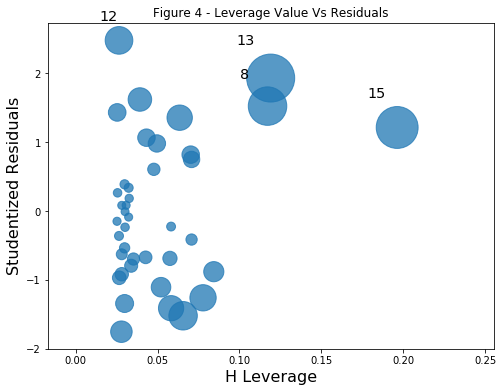

In [31]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( mba_salary_lm, ax = ax )
plt.title( "Figure 4 - Leverage Value Vs Residuals")
plt.show();

In [32]:
pred_y = mba_salary_lm.predict( test_X )

In [33]:
from sklearn.metrics import r2_score, mean_squared_error
np.abs(r2_score(test_y, pred_y))


0.15664584974230378

In [34]:
import numpy
np.sqrt(mean_squared_error(test_y, pred_y))

73458.04348346894

In [35]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
pred_y = mba_salary_lm.predict( test_X )
_, pred_y_low, pred_y_high = wls_prediction_std( mba_salary_lm,
test_X,
alpha = 0.1)
pred_y_df = pd.DataFrame( { 'grade_10_perc': test_X['Percentage in Grade 10'],
'pred_y': pred_y,
'pred_y_left': pred_y_low,
'pred_y_right': pred_y_high } )

In [36]:
pred_y_df[0:10]

,grade_10_perc,pred_y,pred_y_left,pred_y_right
6,70.0,279828.402452,158379.832044,401276.972860
36,68.0,272707.227686,151576.715020,393837.740352
37,52.0,215737.829560,92950.942395,338524.716726
28,58.0,237101.353858,115806.869618,358395.838097
43,74.5,295851.045675,173266.083342,418436.008008
49,60.8,247070.998530,126117.560983,368024.436076
5,55.0,226419.591709,104507.444388,348331.739030
33,78.0,308313.101515,184450.060488,432176.142542
20,63.0,254904.290772,134057.999258,375750.582286
42,74.4,295494.986937,172941.528691,418048.445182
